In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, mean_squared_error,mean_absolute_percentage_error,r2_score
import tensorflow as tf
import talib
from tensorflow import keras
from sklearn.pipeline import make_pipeline
from tensorflow.keras import regularizers
tf.config.set_visible_devices([], 'GPU')

In [2]:
data=yf.download('0700.hk')

[*********************100%***********************]  1 of 1 completed


In [3]:
# data['6day MA'] = data['Close'].rolling(window = 6).mean()
# data['12day MA'] = data['Close'].rolling(window = 12).mean()
# data['RSI'] = talib.RSI(data['Close'].values, timeperiod = 7)
# data['%R5'] = talib.WILLR(data['High'].values, data['Low'].values, data['Close'].values, 5)
# data['%R10'] = talib.WILLR(data['High'].values, data['Low'].values, data['Close'].values, 10)
# data['MI6']=talib.MOM(data['Close'],timeperiod=6)
# data['MI12']=talib.MOM(data['Close'],timeperiod=12)
# macd, macdsignal, macdhist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
# data['EMA12']=talib.EMA(data['Close'], timeperiod=12)
# data['EMA26']=talib.EMA(data['Close'],timeperiod=26)
# data['MACD']=macd
# data['TR']=talib.TRANGE(data['High'],data['Low'],data['Close'])
# data['OSC6']=talib.CMO(data['Close'], timeperiod=6)
# data['OSC12']=talib.CMO(data['Close'], timeperiod=12)
data['Prediction']=data['Close'].shift(-1)
data.dropna(inplace=True)

In [4]:
data_val=data[-100:]
data=data[:-100]
data_val.tail()

,Open,High,Low,Close,Adj Close,Volume,Prediction
Date,,,,,,,
2022-03-31,382.399994,382.399994,372.600006,374.200012,374.200012,14589554,378.799988
2022-04-01,367.000000,378.799988,362.200012,378.799988,378.799988,14496674,390.000000
2022-04-04,388.799988,391.000000,383.799988,390.000000,390.000000,15665556,381.000000
2022-04-06,383.000000,385.000000,380.000000,381.000000,381.000000,17127923,374.399994
2022-04-07,375.600006,383.600006,373.799988,374.399994,374.399994,15874056,369.600006


In [5]:
sc = MinMaxScaler(feature_range = (-1, 1))

In [6]:
X=sc.fit_transform(data.drop('Prediction',1))
Y = data["Prediction"].values.reshape(-1,1)
# Y=np.array(data["Close"])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(3873, 1, 6) (3873, 1) (431, 1, 6) (431, 1)


/var/folders/8h/w0jn89bj2w5g85gj4ck7w0t00000gn/T/ipykernel_73500/2420511516.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=sc.fit_transform(data.drop('Prediction',1))


In [7]:
model_tech = keras.Sequential()
model_tech.add(keras.layers.LSTM(
  units=128,
  input_shape=(X_train.shape[1], X_train.shape[2]),
    return_sequences=True
   
))
model_tech.add(keras.layers.LSTM(units=64))
model_tech.add(keras.layers.Dense(units=64))
model_tech.add(keras.layers.Dense(units=1))
model_tech.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

In [8]:
history_tech=model_tech.fit(
    X_train, y_train,
    epochs=300,
    batch_size=5,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)
y_pred = model_tech.predict(X_test)

Epoch 1/300


2022-04-10 14:59:45.775899: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


697/697 [==============================] - 3s 2ms/step - loss: 11680.3496 - val_loss: 728.2406
Epoch 2/300
697/697 [==============================] - 1s 1ms/step - loss: 263.5935 - val_loss: 112.3606
Epoch 3/300
697/697 [==============================] - 1s 1ms/step - loss: 75.3851 - val_loss: 68.4372
Epoch 4/300
697/697 [==============================] - 1s 1ms/step - loss: 62.1346 - val_loss: 57.7752
Epoch 5/300
697/697 [==============================] - 1s 1ms/step - loss: 56.8680 - val_loss: 56.3496
Epoch 6/300
697/697 [==============================] - 1s 2ms/step - loss: 53.7606 - val_loss: 57.0431
Epoch 7/300
697/697 [==============================] - 1s 1ms/step - loss: 51.6454 - val_loss: 57.7713
Epoch 8/300
697/697 [==============================] - 1s 1ms/step - loss: 50.0809 - val_loss: 58.0425
Epoch 9/300
697/697 [==============================] - 1s 1ms/step - loss: 48.8380 - val_loss: 57.8626
Epoch 10/300
697/697 [==============================] - 1s 1ms/step - loss: 47.

Epoch 80/300
697/697 [==============================] - 1s 1ms/step - loss: 35.3999 - val_loss: 29.5022
Epoch 81/300
697/697 [==============================] - 1s 1ms/step - loss: 35.3709 - val_loss: 29.3329
Epoch 82/300
697/697 [==============================] - 1s 1ms/step - loss: 35.3505 - val_loss: 29.1975
Epoch 83/300
697/697 [==============================] - 1s 1ms/step - loss: 35.3225 - val_loss: 29.0381
Epoch 84/300
697/697 [==============================] - 1s 1ms/step - loss: 35.3004 - val_loss: 28.8998
Epoch 85/300
697/697 [==============================] - 1s 1ms/step - loss: 35.2742 - val_loss: 28.7463
Epoch 86/300
697/697 [==============================] - 1s 1ms/step - loss: 35.2546 - val_loss: 28.6208
Epoch 87/300
697/697 [==============================] - 1s 1ms/step - loss: 35.2281 - val_loss: 28.4713
Epoch 88/300
697/697 [==============================] - 1s 1ms/step - loss: 35.2095 - val_loss: 28.3538
Epoch 89/300
697/697 [==============================] - 1s 1ms/s

697/697 [==============================] - 1s 1ms/step - loss: 34.0891 - val_loss: 23.6690
Epoch 159/300
697/697 [==============================] - 1s 1ms/step - loss: 34.0496 - val_loss: 23.6201
Epoch 160/300
697/697 [==============================] - 1s 1ms/step - loss: 34.0649 - val_loss: 23.5952
Epoch 161/300
697/697 [==============================] - 1s 1ms/step - loss: 34.0244 - val_loss: 23.5469
Epoch 162/300
697/697 [==============================] - 1s 1ms/step - loss: 34.0396 - val_loss: 23.5228
Epoch 163/300
697/697 [==============================] - 1s 1ms/step - loss: 33.9993 - val_loss: 23.4758
Epoch 164/300
697/697 [==============================] - 1s 1ms/step - loss: 34.0172 - val_loss: 23.4538
Epoch 165/300
697/697 [==============================] - 1s 1ms/step - loss: 33.9742 - val_loss: 23.4063
Epoch 166/300
697/697 [==============================] - 1s 1ms/step - loss: 33.9942 - val_loss: 23.3862
Epoch 167/300
697/697 [==============================] - 1s 1ms/step 

697/697 [==============================] - 1s 990us/step - loss: 33.2182 - val_loss: 22.1089
Epoch 236/300
697/697 [==============================] - 1s 989us/step - loss: 33.2376 - val_loss: 22.1005
Epoch 237/300
697/697 [==============================] - 1s 990us/step - loss: 33.1984 - val_loss: 22.0928
Epoch 238/300
697/697 [==============================] - 1s 995us/step - loss: 33.2179 - val_loss: 22.0848
Epoch 239/300
697/697 [==============================] - 1s 1ms/step - loss: 33.1789 - val_loss: 22.0782
Epoch 240/300
697/697 [==============================] - 1s 1ms/step - loss: 33.1983 - val_loss: 22.0705
Epoch 241/300
697/697 [==============================] - 1s 1ms/step - loss: 33.1596 - val_loss: 22.0649
Epoch 242/300
697/697 [==============================] - 1s 1ms/step - loss: 33.1783 - val_loss: 22.0574
Epoch 243/300
697/697 [==============================] - 1s 2ms/step - loss: 33.1404 - val_loss: 22.0527
Epoch 244/300
697/697 [==============================] - 3s 4

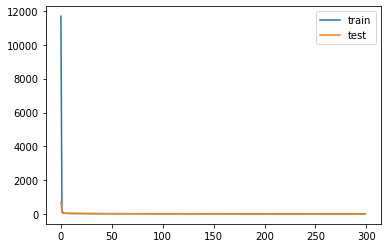

In [9]:
plt.plot(history_tech.history['loss'], label='train')
plt.plot(history_tech.history['val_loss'], label='test')
plt.legend()

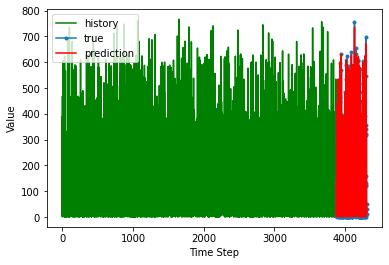

In [10]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

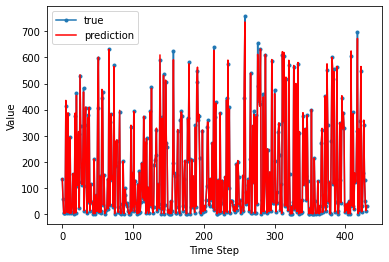

In [11]:
# y_test = sc.inverse_transform(y_test)
# y_pred = sc.inverse_transform(y_pred)
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [12]:
r2_score(y_test,y_pred)

0.9986180719377

In [13]:
mean_absolute_percentage_error(y_test,y_pred)

0.052286483739812276

In [14]:
mean_squared_error(y_test,y_pred,squared=False)

6.845921206532251

In [15]:
x_val=data_val.drop('Prediction',1)
y_val=data_val['Prediction']
x_val=sc.transform(x_val).reshape(x_val.shape[0],1,x_val.shape[1])
y_val_pred=model_tech.predict(x_val)

/var/folders/8h/w0jn89bj2w5g85gj4ck7w0t00000gn/T/ipykernel_73500/2328949661.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_val=data_val.drop('Prediction',1)


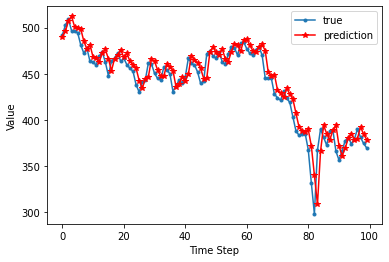

In [16]:
plt.plot(y_val.values, marker='.', label="true")
plt.plot(y_val_pred, 'r', marker='*',label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [17]:
r2_score(y_val,y_val_pred)

0.8932954354359433

In [18]:
mean_absolute_percentage_error(y_val,y_val_pred)

0.024839582007623248

In [19]:
mean_squared_error(y_val.values,y_val_pred,squared=False)

13.861465581112201